In [ ]:
pip install histomicstk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.5/535.5 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 98.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.6/633.6 kB 53.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.2/97.2 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 125.5 MB/s eta 0:00:00
INFO: pip is loo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install histomicstk --find-links https://girder.github.io/large_image_wheels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://girder.github.io/large_image_wheels
  Using cached histomicstk-1.2.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (535 kB)
  Using cached girder-client-3.1.20.tar.gz (20 kB)
  Preparing metadata (setup.py) ... done
  Using cached nimfa-1.4.0-py2.py3-none-any.whl (4.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 MB 14.0 MB/s eta 0:00:00
  Using cached girder_slicer_cli_web-1.3.4-py2.py3-none-any.whl (97 kB)
  Using cached ctk_cli-1.5-py3-none-any.whl (10 kB)
  Using cached large_image-1.21.0-py3-none-any.whl (71 kB)
  Using cached diskcache-5.6.1-py3-none-any.whl (45 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
  Using cached large_image_source_deepzoom-1.21.0-py3-none-any.whl (8.1 kB)
  Using cached large_image_source_test-1.21.0-py3-none-any.whl (10 kB)
  Using cached large_image_source_multi-1.21.0-py3-non

In [ ]:
import skimage.io as io
import numpy as np
import histomicstk.preprocessing.color_normalization as htk_cnorm


In [ ]:
import cv2
import numpy as np

In [ ]:
def deconvolution_stain_normalization(image):
    # Define the stain matrix
    stain_matrix = np.array([[0.650, 0.072, 0.268],  # Hematoxylin
                             [0.704, 0.990, 0.570],  # Eosin
                             [0.286, 0.105, 0.776]])  # DAB

    # Normalize the stain matrix
    stain_matrix_norm = stain_matrix / np.linalg.norm(stain_matrix, axis=0)

    # Split the image into color channels
    b, g, r = cv2.split(image)

    # Convert the image to float32
    b = b.astype(np.float32)
    g = g.astype(np.float32)
    r = r.astype(np.float32)

    # Merge the channels into a 3D matrix
    image_matrix = np.stack([b, g, r], axis=2)

    # Normalize the image matrix
    image_matrix_norm = image_matrix / 255.0

    # Perform the stain color normalization
    transformed_matrix = np.dot(image_matrix_norm, stain_matrix_norm)

    # Scale the transformed matrix to 0-255 range
    transformed_matrix *= 255.0

    # Split the transformed matrix into color channels
    b_norm, g_norm, r_norm = cv2.split(transformed_matrix)

    # Convert the normalized channels to uint8
    b_norm = b_norm.astype(np.uint8)
    g_norm = g_norm.astype(np.uint8)
    r_norm = r_norm.astype(np.uint8)

    # Merge the normalized channels
    normalized_image = cv2.merge([b_norm, g_norm, r_norm])

    return normalized_image

In [ ]:
from google.colab.patches import cv2_imshow

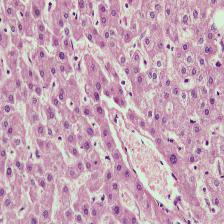

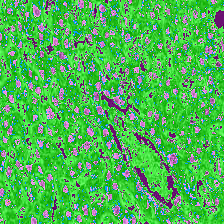

In [ ]:
input_image = cv2.imread('/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Hepatoma-Stages-Dataset/ADASYN_images/Non_cancerous/f10.jpeg')

# Apply deconvolution stain color normalization
normalized_image = deconvolution_stain_normalization(input_image)

# Display the original and normalized images
cv2_imshow(input_image)
cv2_imshow(normalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

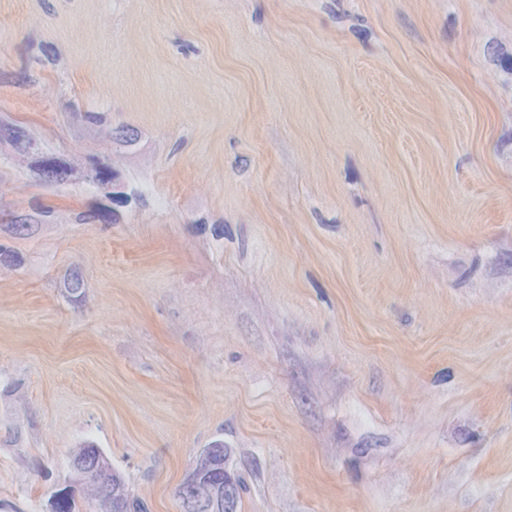

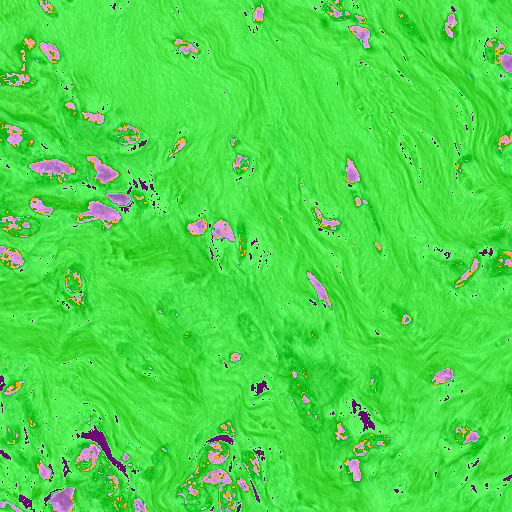

In [ ]:
input_image = cv2.imread('/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Nucleus-Segmentation/images/01_1.png')

# Apply deconvolution stain color normalization
normalized_image = deconvolution_stain_normalization(input_image)

# Display the original and normalized images
cv2_imshow(input_image)
cv2_imshow(normalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image_path='/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Nucleus-Segmentation/images'
groundtruth_path='/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Nucleus-Segmentation/groundtruth'

In [ ]:
import os

In [ ]:
img_id=[]
for image in os.listdir(image_path):
  img_id.append(image)
  #print(img_id)
img_id.sort()
print(img_id)

['.ipynb_checkpoints', '01_1.png', '01_2.png', '01_3.png', '01_4.png', '01_5.png', '01_6.png', '01_7.png', '02_1.png', '02_2.png', '02_3.png', '03_1.png', '03_2.png', '03_3.png', '03_4.png', '03_5.png', '04_1.png', '04_2.png', '04_3.png', '04_4.png', '04_5.png', '04_6.png', '04_7.png', '04_8.png', '05_1.png', '05_2.png', '05_3.png', '05_4.png', '06_1.png', '06_2.png', '06_3.png', '07_1.png', '07_2.png', '07_3.png', '08_1.png', '08_2.png', '08_3.png', '08_4.png', '09_1.png', '09_2.png', '09_3.png', '09_4.png', '09_5.png', '09_6.png', '10_1.png', '10_2.png', '10_3.png', '10_4.png', '11_1.png', '11_2.png', '11_3.png']


In [ ]:
image_path ='/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Nucleus-Segmentation/images'+'/'+id_name

In [28]:
i=0
save_path='/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Nucleus-Segmentation/images_normalised'
for img in img_id[1:]:
  path=image_path+'/'+img
  print(path)
  input_image = cv2.imread(path)
  cv2_imshow(input_image)
  # Apply deconvolution stain color normalization
  normalized_image = deconvolution_stain_normalization(input_image)

  # Display the original and normalized images
  
  cv2_imshow(normalized_image)
  isWritten=cv2.imwrite(save_path+'/'+img,normalized_image)
  if(isWritten):
    print('Wrote image: '+img)


Output hidden; open in https://colab.research.google.com to view.

In [29]:
image_path='/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Hepatoma-Stages-Dataset/ADASYN_images/Non_cancerous'

In [31]:
img_id=[]
for image in os.listdir(image_path):
  img_id.append(image)
  #print(img_id)
img_id.sort()
print(img_id)
print(len(img_id))

['f10.jpeg', 'f102.jpeg', 'f106.jpeg', 'f107.jpeg', 'f108.jpeg', 'f11.jpeg', 'f110.jpeg', 'f111.jpeg', 'f112.jpeg', 'f113.jpeg', 'f117.jpeg', 'f118.jpeg', 'f121.jpeg', 'f123.jpeg', 'f125.jpeg', 'f133.jpeg', 'f134.jpeg', 'f137.jpeg', 'f138.jpeg', 'f140.jpeg', 'f148.jpeg', 'f15.jpeg', 'f150.jpeg', 'f151.jpeg', 'f153.jpeg', 'f154.jpeg', 'f158.jpeg', 'f16.jpeg', 'f167.jpeg', 'f17.jpeg', 'f171.jpeg', 'f180.jpeg', 'f181.jpeg', 'f185.jpeg', 'f188.jpeg', 'f19.jpeg', 'f190.jpeg', 'f191.jpeg', 'f192.jpeg', 'f194.jpeg', 'f2.jpeg', 'f200.jpeg', 'f201.jpeg', 'f202.jpeg', 'f204.jpeg', 'f205.jpeg', 'f207.jpeg', 'f210.jpeg', 'f211.jpeg', 'f216.jpeg', 'f217.jpeg', 'f22.jpeg', 'f223.jpeg', 'f226.jpeg', 'f227.jpeg', 'f232.jpeg', 'f233.jpeg', 'f236.jpeg', 'f24.jpeg', 'f242.jpeg', 'f244.jpeg', 'f245.jpeg', 'f247.jpeg', 'f249.jpeg', 'f250.jpeg', 'f255.jpeg', 'f256.jpeg', 'f257.jpeg', 'f258.jpeg', 'f261.jpeg', 'f265.jpeg', 'f270.jpeg', 'f272.jpeg', 'f28.jpeg', 'f283.jpeg', 'f284.jpeg', 'f29.jpeg', 'f290.jpeg

In [32]:
i=0
save_path='/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Hepatoma-Stages-Dataset/ADASYN_normalised/Non_cancerous'
for img in img_id:
  path=image_path+'/'+img
  print(path)
  input_image = cv2.imread(path)
  cv2_imshow(input_image)
  # Apply deconvolution stain color normalization
  normalized_image = deconvolution_stain_normalization(input_image)

  # Display the original and normalized images
  
  cv2_imshow(normalized_image)
  isWritten=cv2.imwrite(save_path+'/'+img,normalized_image)
  if(isWritten):
    print('Wrote image: '+img)


Output hidden; open in https://colab.research.google.com to view.

#Sanity Check

In [33]:
image_path='/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Hepatoma-Stages-Dataset/ADASYN_normalised/Non_cancerous'

In [34]:
img_id=[]
for image in os.listdir(image_path):
  img_id.append(image)
  #print(img_id)
img_id.sort()
print(img_id)
print(len(img_id))

['f10.jpeg', 'f102.jpeg', 'f106.jpeg', 'f107.jpeg', 'f108.jpeg', 'f11.jpeg', 'f110.jpeg', 'f111.jpeg', 'f112.jpeg', 'f113.jpeg', 'f117.jpeg', 'f118.jpeg', 'f121.jpeg', 'f123.jpeg', 'f125.jpeg', 'f133.jpeg', 'f134.jpeg', 'f137.jpeg', 'f138.jpeg', 'f140.jpeg', 'f148.jpeg', 'f15.jpeg', 'f150.jpeg', 'f151.jpeg', 'f153.jpeg', 'f154.jpeg', 'f158.jpeg', 'f16.jpeg', 'f167.jpeg', 'f17.jpeg', 'f171.jpeg', 'f180.jpeg', 'f181.jpeg', 'f185.jpeg', 'f188.jpeg', 'f19.jpeg', 'f190.jpeg', 'f191.jpeg', 'f192.jpeg', 'f194.jpeg', 'f2.jpeg', 'f200.jpeg', 'f201.jpeg', 'f202.jpeg', 'f204.jpeg', 'f205.jpeg', 'f207.jpeg', 'f210.jpeg', 'f211.jpeg', 'f216.jpeg', 'f217.jpeg', 'f22.jpeg', 'f223.jpeg', 'f226.jpeg', 'f227.jpeg', 'f232.jpeg', 'f233.jpeg', 'f236.jpeg', 'f24.jpeg', 'f242.jpeg', 'f244.jpeg', 'f245.jpeg', 'f247.jpeg', 'f249.jpeg', 'f250.jpeg', 'f255.jpeg', 'f256.jpeg', 'f257.jpeg', 'f258.jpeg', 'f261.jpeg', 'f265.jpeg', 'f270.jpeg', 'f272.jpeg', 'f28.jpeg', 'f283.jpeg', 'f284.jpeg', 'f29.jpeg', 'f290.jpeg

#Stage 1

In [35]:
image_path='/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Hepatoma-Stages-Dataset/ADASYN_images/Stage_1'

In [36]:
img_id=[]
for image in os.listdir(image_path):
  img_id.append(image)
  #print(img_id)
img_id.sort()
print(img_id)
print(len(img_id))

['f100.jpeg', 'f104.jpeg', 'f122.jpeg', 'f126.jpeg', 'f127.jpeg', 'f128.jpeg', 'f129.jpeg', 'f130.jpeg', 'f135.jpeg', 'f136.jpeg', 'f141.jpeg', 'f144.jpeg', 'f145.jpeg', 'f147.jpeg', 'f149.jpeg', 'f152.jpeg', 'f159.jpeg', 'f162.jpeg', 'f165.jpeg', 'f166.jpeg', 'f169.jpeg', 'f170.jpeg', 'f172.jpeg', 'f175.jpeg', 'f176.jpeg', 'f179.jpeg', 'f184.jpeg', 'f193.jpeg', 'f198.jpeg', 'f20.jpeg', 'f208.jpeg', 'f209.jpeg', 'f213.jpeg', 'f221.jpeg', 'f224.jpeg', 'f225.jpeg', 'f228.jpeg', 'f23.jpeg', 'f230.jpeg', 'f235.jpeg', 'f239.jpeg', 'f246.jpeg', 'f253.jpeg', 'f260.jpeg', 'f263.jpeg', 'f266.jpeg', 'f267.jpeg', 'f268.jpeg', 'f271.jpeg', 'f274.jpeg', 'f276.jpeg', 'f277.jpeg', 'f279.jpeg', 'f282.jpeg', 'f287.jpeg', 'f291.jpeg', 'f293.jpeg', 'f297.jpeg', 'f298.jpeg', 'f3.jpeg', 'f303.jpeg', 'f319.jpeg', 'f327.jpeg', 'f334.jpeg', 'f335.jpeg', 'f337.jpeg', 'f34.jpeg', 'f345.jpeg', 'f351.jpeg', 'f359.jpeg', 'f367.jpeg', 'f371.jpeg', 'f379.jpeg', 'f38.jpeg', 'f384.jpeg', 'f391.jpeg', 'f394.jpeg', 'f39

In [37]:
i=0
save_path='/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Hepatoma-Stages-Dataset/ADASYN_normalised/Stage1'
for img in img_id:
  path=image_path+'/'+img
  print(path)
  input_image = cv2.imread(path)
  cv2_imshow(input_image)
  # Apply deconvolution stain color normalization
  normalized_image = deconvolution_stain_normalization(input_image)

  # Display the original and normalized images
  
  cv2_imshow(normalized_image)
  isWritten=cv2.imwrite(save_path+'/'+img,normalized_image)
  if(isWritten):
    print('Wrote image: '+img)


Output hidden; open in https://colab.research.google.com to view.

#Sanity Check

In [38]:
image_path='/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Hepatoma-Stages-Dataset/ADASYN_normalised/Stage1'

In [39]:
img_id=[]
for image in os.listdir(image_path):
  img_id.append(image)
  #print(img_id)
img_id.sort()
print(img_id)
print(len(img_id))

['f100.jpeg', 'f104.jpeg', 'f122.jpeg', 'f126.jpeg', 'f127.jpeg', 'f128.jpeg', 'f129.jpeg', 'f130.jpeg', 'f135.jpeg', 'f136.jpeg', 'f141.jpeg', 'f144.jpeg', 'f145.jpeg', 'f147.jpeg', 'f149.jpeg', 'f152.jpeg', 'f159.jpeg', 'f162.jpeg', 'f165.jpeg', 'f166.jpeg', 'f169.jpeg', 'f170.jpeg', 'f172.jpeg', 'f175.jpeg', 'f176.jpeg', 'f179.jpeg', 'f184.jpeg', 'f193.jpeg', 'f198.jpeg', 'f20.jpeg', 'f208.jpeg', 'f209.jpeg', 'f213.jpeg', 'f221.jpeg', 'f224.jpeg', 'f225.jpeg', 'f228.jpeg', 'f23.jpeg', 'f230.jpeg', 'f235.jpeg', 'f239.jpeg', 'f246.jpeg', 'f253.jpeg', 'f260.jpeg', 'f263.jpeg', 'f266.jpeg', 'f267.jpeg', 'f268.jpeg', 'f271.jpeg', 'f274.jpeg', 'f276.jpeg', 'f277.jpeg', 'f279.jpeg', 'f282.jpeg', 'f287.jpeg', 'f291.jpeg', 'f293.jpeg', 'f297.jpeg', 'f298.jpeg', 'f3.jpeg', 'f303.jpeg', 'f319.jpeg', 'f327.jpeg', 'f334.jpeg', 'f335.jpeg', 'f337.jpeg', 'f34.jpeg', 'f345.jpeg', 'f351.jpeg', 'f359.jpeg', 'f367.jpeg', 'f371.jpeg', 'f379.jpeg', 'f38.jpeg', 'f384.jpeg', 'f391.jpeg', 'f394.jpeg', 'f39

#Stage 2

In [40]:
image_path='/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Hepatoma-Stages-Dataset/ADASYN_images/Stage_2'

In [41]:
img_id=[]
for image in os.listdir(image_path):
  img_id.append(image)
  #print(img_id)
img_id.sort()
print(img_id)
print(len(img_id))

['f116.jpeg', 'f120.jpeg', 'f139.jpeg', 'f146.jpeg', 'f155.jpeg', 'f156.jpeg', 'f173.jpeg', 'f195.jpeg', 'f206.jpeg', 'f21.jpeg', 'f212.jpeg', 'f214.jpeg', 'f215.jpeg', 'f229.jpeg', 'f238.jpeg', 'f240.jpeg', 'f241.jpeg', 'f25.jpeg', 'f259.jpeg', 'f273.jpeg', 'f275.jpeg', 'f286.jpeg', 'f288.jpeg', 'f296.jpeg', 'f300.jpeg', 'f315.jpeg', 'f316.jpeg', 'f317.jpeg', 'f318.jpeg', 'f32.jpeg', 'f323.jpeg', 'f329.jpeg', 'f343.jpeg', 'f344.jpeg', 'f363.jpeg', 'f365.jpeg', 'f368.jpeg', 'f385.jpeg', 'f388.jpeg', 'f390.jpeg', 'f395.jpeg', 'f399.jpeg', 'f401.jpeg', 'f415.jpeg', 'f419.jpeg', 'f42.jpeg', 'f423.jpeg', 'f425.jpeg', 'f430.jpeg', 'f434.jpeg', 'f444.jpeg', 'f448.jpeg', 'f461.jpeg', 'f462.jpeg', 'f535.jpeg', 'f55.jpeg', 'f6.jpeg', 'f61.jpeg', 'f76.jpeg', 'f85.jpeg', 'f91.jpeg', 'f92.jpeg', 'f93.jpeg']
63


In [42]:
i=0
save_path='/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Hepatoma-Stages-Dataset/ADASYN_normalised/Stage2'
for img in img_id:
  path=image_path+'/'+img
  print(path)
  input_image = cv2.imread(path)
  cv2_imshow(input_image)
  # Apply deconvolution stain color normalization
  normalized_image = deconvolution_stain_normalization(input_image)

  # Display the original and normalized images
  
  cv2_imshow(normalized_image)
  isWritten=cv2.imwrite(save_path+'/'+img,normalized_image)
  if(isWritten):
    print('Wrote image: '+img)


Output hidden; open in https://colab.research.google.com to view.

#Sanity Check

In [43]:
image_path='/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Hepatoma-Stages-Dataset/ADASYN_normalised/Stage2'

In [44]:
img_id=[]
for image in os.listdir(image_path):
  img_id.append(image)
  #print(img_id)
img_id.sort()
print(img_id)
print(len(img_id))

['f116.jpeg', 'f120.jpeg', 'f139.jpeg', 'f146.jpeg', 'f155.jpeg', 'f156.jpeg', 'f173.jpeg', 'f195.jpeg', 'f206.jpeg', 'f21.jpeg', 'f212.jpeg', 'f214.jpeg', 'f215.jpeg', 'f229.jpeg', 'f238.jpeg', 'f240.jpeg', 'f241.jpeg', 'f25.jpeg', 'f259.jpeg', 'f273.jpeg', 'f275.jpeg', 'f286.jpeg', 'f288.jpeg', 'f296.jpeg', 'f300.jpeg', 'f315.jpeg', 'f316.jpeg', 'f317.jpeg', 'f318.jpeg', 'f32.jpeg', 'f323.jpeg', 'f329.jpeg', 'f343.jpeg', 'f344.jpeg', 'f363.jpeg', 'f365.jpeg', 'f368.jpeg', 'f385.jpeg', 'f388.jpeg', 'f390.jpeg', 'f395.jpeg', 'f399.jpeg', 'f401.jpeg', 'f415.jpeg', 'f419.jpeg', 'f42.jpeg', 'f423.jpeg', 'f425.jpeg', 'f430.jpeg', 'f434.jpeg', 'f444.jpeg', 'f448.jpeg', 'f461.jpeg', 'f462.jpeg', 'f535.jpeg', 'f55.jpeg', 'f6.jpeg', 'f61.jpeg', 'f76.jpeg', 'f85.jpeg', 'f91.jpeg', 'f92.jpeg', 'f93.jpeg']
63


#Stage 3

In [45]:
image_path='/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Hepatoma-Stages-Dataset/ADASYN_images/Stage_3'

In [46]:
img_id=[]
for image in os.listdir(image_path):
  img_id.append(image)
  #print(img_id)
img_id.sort()
print(img_id)
print(len(img_id))

['f0.jpeg', 'f1.jpeg', 'f101.jpeg', 'f103.jpeg', 'f105.jpeg', 'f109.jpeg', 'f114.jpeg', 'f115.jpeg', 'f119.jpeg', 'f12.jpeg', 'f124.jpeg', 'f13.jpeg', 'f131.jpeg', 'f132.jpeg', 'f14.jpeg', 'f142.jpeg', 'f143.jpeg', 'f157.jpeg', 'f160.jpeg', 'f161.jpeg', 'f163.jpeg', 'f164.jpeg', 'f168.jpeg', 'f174.jpeg', 'f177.jpeg', 'f178.jpeg', 'f18.jpeg', 'f182.jpeg', 'f183.jpeg', 'f186.jpeg', 'f187.jpeg', 'f189.jpeg', 'f196.jpeg', 'f197.jpeg', 'f199.jpeg', 'f203.jpeg', 'f218.jpeg', 'f219.jpeg', 'f220.jpeg', 'f222.jpeg', 'f231.jpeg', 'f234.jpeg', 'f237.jpeg', 'f243.jpeg', 'f248.jpeg', 'f251.jpeg', 'f252.jpeg', 'f254.jpeg', 'f26.jpeg', 'f262.jpeg', 'f264.jpeg', 'f269.jpeg', 'f27.jpeg', 'f278.jpeg', 'f280.jpeg', 'f281.jpeg', 'f285.jpeg', 'f289.jpeg', 'f292.jpeg', 'f295.jpeg', 'f299.jpeg', 'f301.jpeg', 'f304.jpeg', 'f306.jpeg', 'f308.jpeg', 'f310.jpeg', 'f312.jpeg', 'f313.jpeg', 'f320.jpeg', 'f321.jpeg', 'f322.jpeg', 'f324.jpeg', 'f325.jpeg', 'f326.jpeg', 'f33.jpeg', 'f331.jpeg', 'f338.jpeg', 'f339.jpe

In [47]:
i=0
save_path='/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Hepatoma-Stages-Dataset/ADASYN_normalised/Stage3'
for img in img_id:
  path=image_path+'/'+img
  print(path)
  input_image = cv2.imread(path)
  cv2_imshow(input_image)
  # Apply deconvolution stain color normalization
  normalized_image = deconvolution_stain_normalization(input_image)

  # Display the original and normalized images
  
  cv2_imshow(normalized_image)
  isWritten=cv2.imwrite(save_path+'/'+img,normalized_image)
  if(isWritten):
    print('Wrote image: '+img)


Output hidden; open in https://colab.research.google.com to view.

#Stage 3

In [48]:
image_path='/content/drive/MyDrive/Hepatoma-Staging-Project/Dataset/Hepatoma-Stages-Dataset/ADASYN_normalised/Stage3'

In [49]:
img_id=[]
for image in os.listdir(image_path):
  img_id.append(image)
  #print(img_id)
img_id.sort()
print(img_id)
print(len(img_id))

['f0.jpeg', 'f1.jpeg', 'f101.jpeg', 'f103.jpeg', 'f105.jpeg', 'f109.jpeg', 'f114.jpeg', 'f115.jpeg', 'f119.jpeg', 'f12.jpeg', 'f124.jpeg', 'f13.jpeg', 'f131.jpeg', 'f132.jpeg', 'f14.jpeg', 'f142.jpeg', 'f143.jpeg', 'f157.jpeg', 'f160.jpeg', 'f161.jpeg', 'f163.jpeg', 'f164.jpeg', 'f168.jpeg', 'f174.jpeg', 'f177.jpeg', 'f178.jpeg', 'f18.jpeg', 'f182.jpeg', 'f183.jpeg', 'f186.jpeg', 'f187.jpeg', 'f189.jpeg', 'f196.jpeg', 'f197.jpeg', 'f199.jpeg', 'f203.jpeg', 'f218.jpeg', 'f219.jpeg', 'f220.jpeg', 'f222.jpeg', 'f231.jpeg', 'f234.jpeg', 'f237.jpeg', 'f243.jpeg', 'f248.jpeg', 'f251.jpeg', 'f252.jpeg', 'f254.jpeg', 'f26.jpeg', 'f262.jpeg', 'f264.jpeg', 'f269.jpeg', 'f27.jpeg', 'f278.jpeg', 'f280.jpeg', 'f281.jpeg', 'f285.jpeg', 'f289.jpeg', 'f292.jpeg', 'f295.jpeg', 'f299.jpeg', 'f301.jpeg', 'f304.jpeg', 'f306.jpeg', 'f308.jpeg', 'f310.jpeg', 'f312.jpeg', 'f313.jpeg', 'f320.jpeg', 'f321.jpeg', 'f322.jpeg', 'f324.jpeg', 'f325.jpeg', 'f326.jpeg', 'f33.jpeg', 'f331.jpeg', 'f338.jpeg', 'f339.jpe